In [7]:
import numpy as np
from numpy.random import multivariate_normal as mvn
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from cycler import cycler

import sys
sys.path.insert(1,'../')
from mfvi_main import *
from lmc_algorithm import langevin_monte_carlo
from BayesianUtils import *


## Bayesian logistic regression

We first establish the problem parameters by defining $\{(X_i,Y_i)\}_{i=1}^n$ pairs of randomly generated data. We assume access to $V$ and $\nabla V$ as in standard Bayesian settings.

In [8]:
d = 20
n_data = 100 

true_theta = mvn(np.zeros(d), np.eye(d))

Xdata = mvn(np.zeros(d),np.eye(d),size=n_data)
maxeig = np.linalg.eig(Xdata.T @ Xdata)[0][0]
Xdata = Xdata / np.sqrt(maxeig)
probs = softmax(Xdata @ true_theta)
Ydata = bernoulli.rvs(probs)

V = lambda theta: V_logistic(theta, Y=Ydata, X=Xdata)
gradV = lambda theta: gradV_logistic(theta, Y=Ydata, X=Xdata)

## Langevin Monte Carlo (LMC)

We compare against LMC, which is easy to run given query access to $\nabla V$.

In [9]:
Nmcmc = 2000
h=0.01
iters=5000

X_LMC = langevin_monte_carlo(gradV, Nmcmc, d, h, iters=iters)

## Mean-field VI

We establish our model parameters, and then run our algorithm

In [10]:
### Establish approximating family M
mesh=0.2
trunc=2.9

MFVI_obj = MFVI(V, gradV, mesh, trunc,d)

### Optimization parameters
alpha = 0.1
step_size = 1e-2
step_sizev = 1e-2
num_iters = 2000
batch_size = 2000
lamb0 = np.ones((d, MFVI_obj.J))/(d*MFVI_obj.J)

In [11]:
MFVI_obj.SPGD(alpha, step_size, step_sizev, lamb0, batch_size=batch_size,num_iters=num_iters)

Iter: 50
Iter: 100
Iter: 150
Iter: 200
Iter: 250
Iter: 300
Iter: 350
Iter: 400
Iter: 450
Iter: 500
Iter: 550
Iter: 600
Iter: 650
Iter: 700
Iter: 750
Iter: 800
Iter: 850
Iter: 900
Iter: 950
Iter: 1000
Iter: 1050
Iter: 1100
Iter: 1150
Iter: 1200
Iter: 1250
Iter: 1300
Iter: 1350
Iter: 1400
Iter: 1450
Iter: 1500
Iter: 1550
Iter: 1600
Iter: 1650
Iter: 1700
Iter: 1750
Iter: 1800
Iter: 1850
Iter: 1900
Iter: 1950


## Generate + visualize

We compute samples following our mean-field approximation algorithm, and visually compare to LMC

In [12]:
Nmcmc = 2000
mfapprox_BLogR = MFVI_obj.gen_mfapprox(Nmcmc)

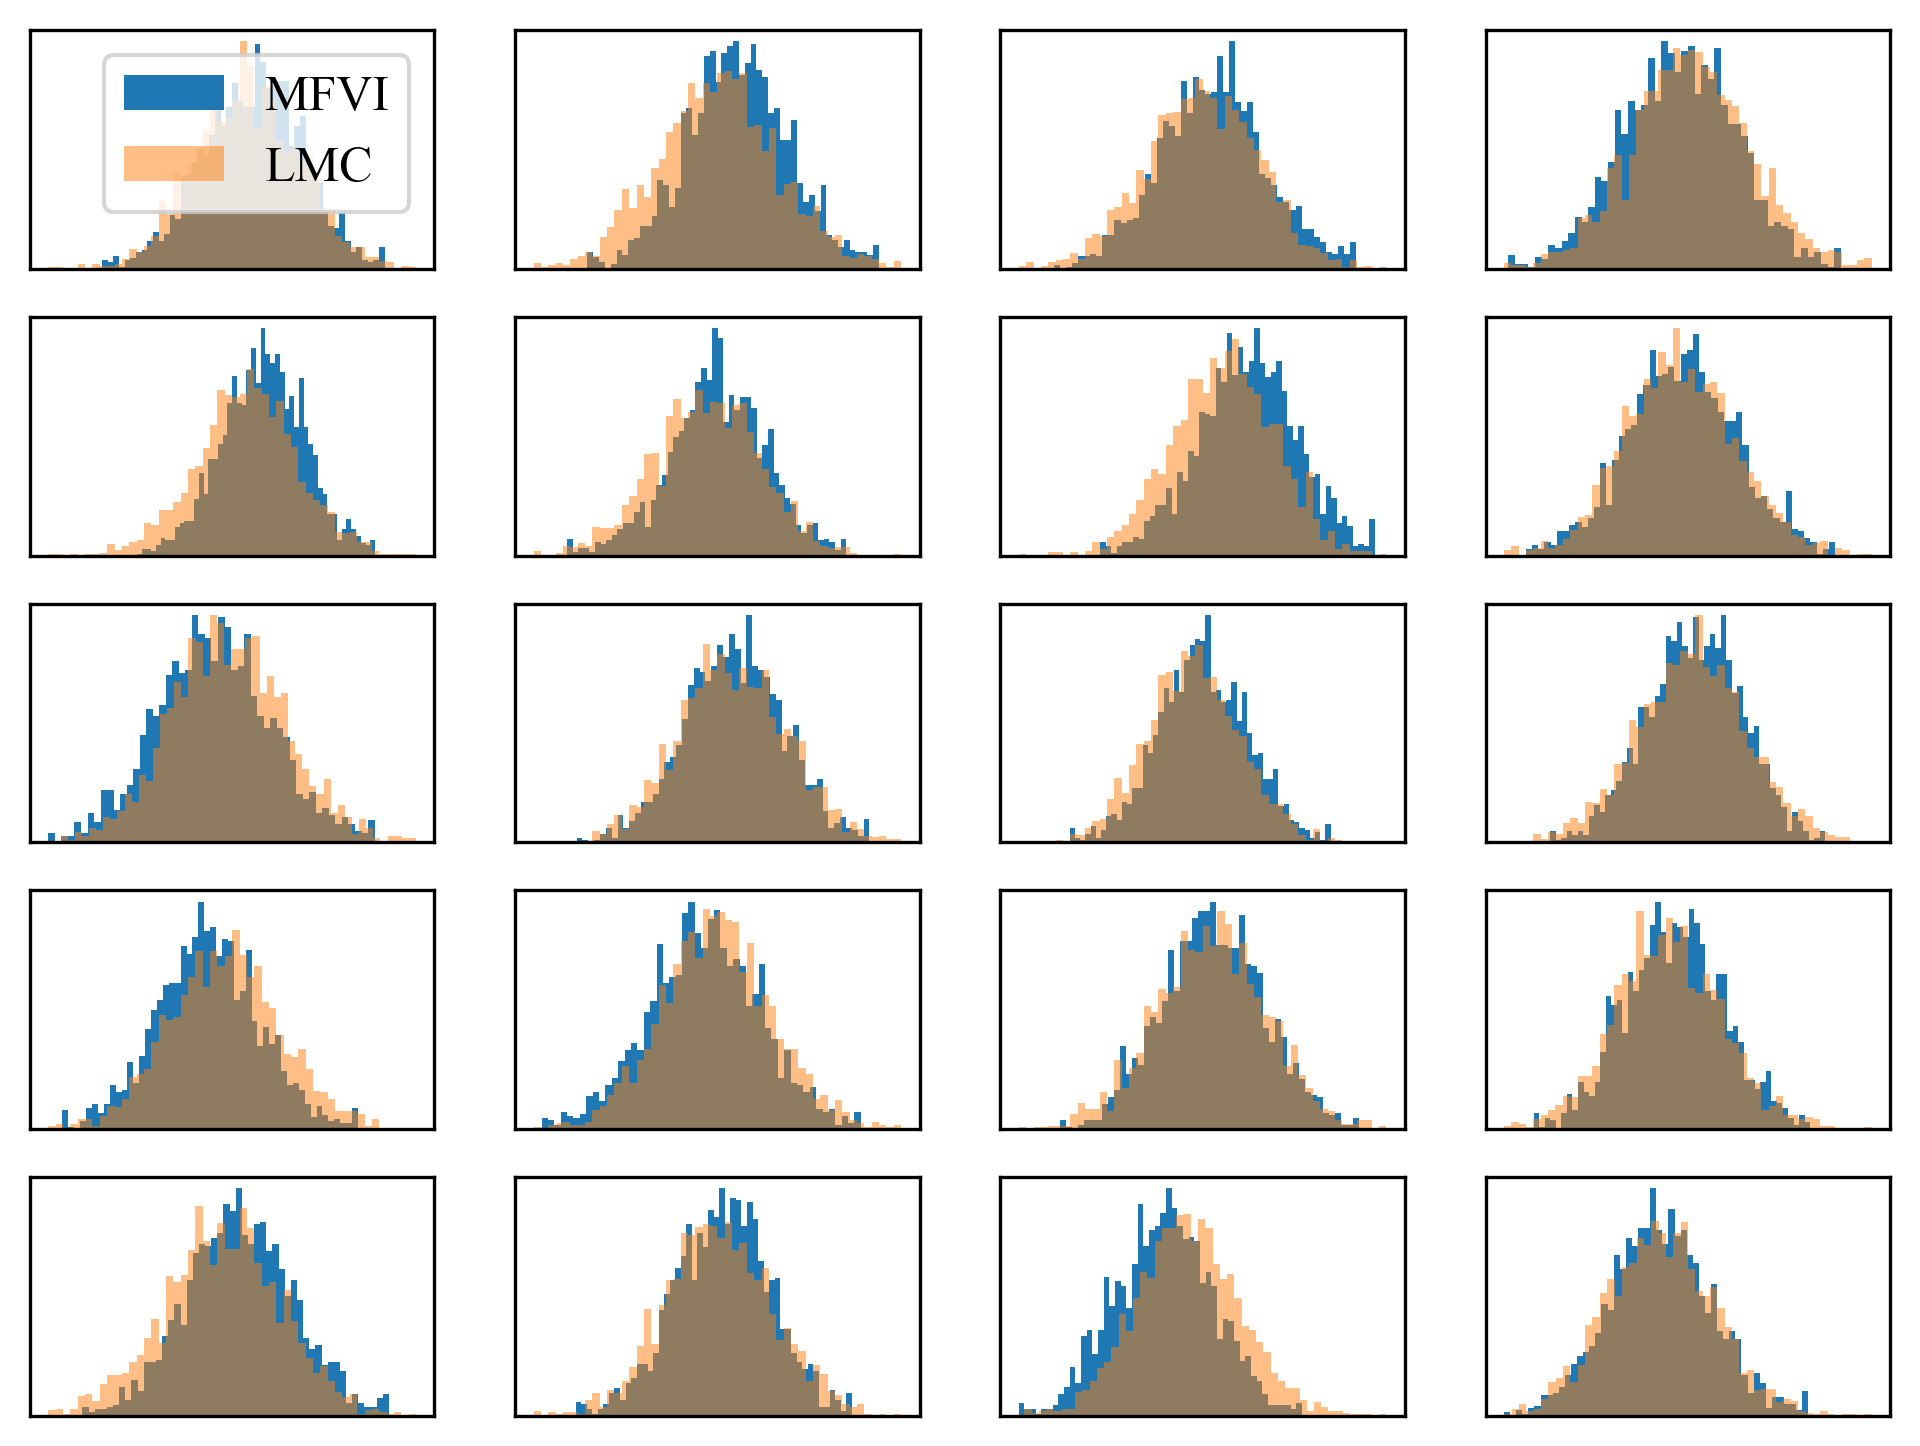

In [13]:
nrow = 5
ncol = 4
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(nrow,ncol, dpi=300, figsize=(8, 6))


for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        d_ = ncol*i+j
        if i == j == 0:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True,label='MFVI')
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True,label='LMC')
            ax.legend(fontsize='12')
        else:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True)
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True)
        ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 

plt.show()

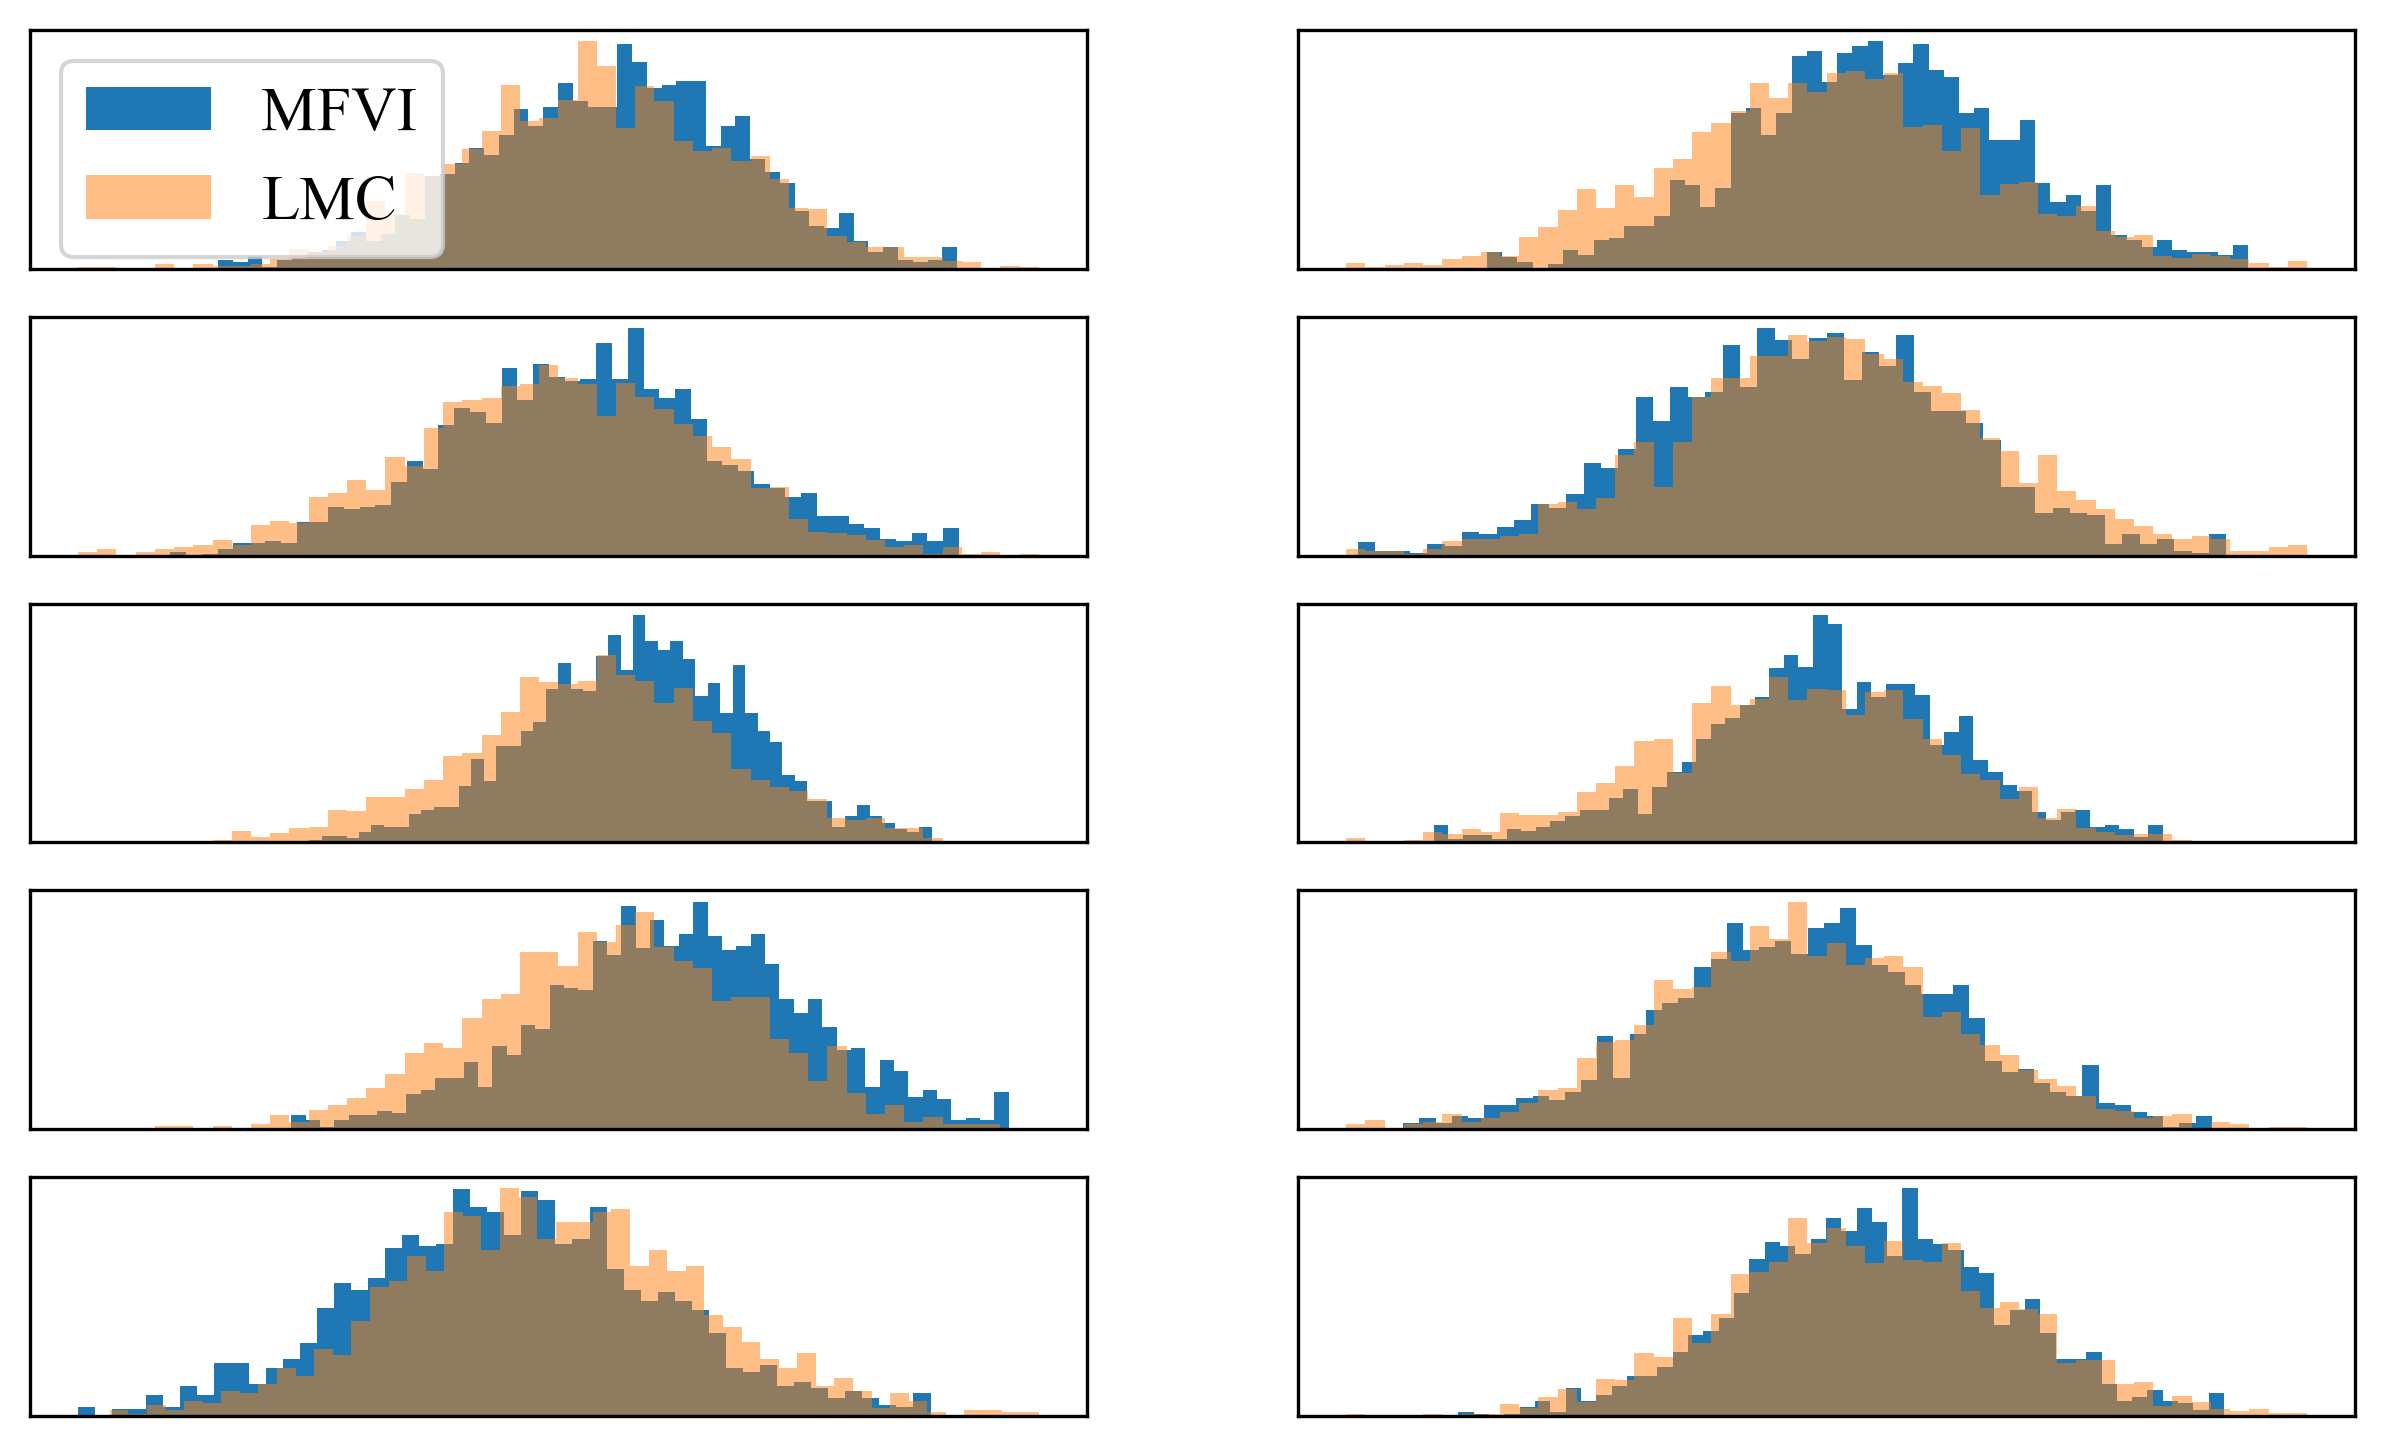

In [14]:
nrow = 5
ncol = 2
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(nrow,ncol, dpi=300, figsize=(10, 6))


for i in range(nrow):
    for j in range(ncol):
        ax = axs[i][j]
        d_ = ncol*i+j
        if i == j == 0:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True,label='MFVI')
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True,label='LMC')
            ax.legend(fontsize='15',loc='upper left',)
        else:
            ax.hist(mfapprox_BLogR[:,d_], bins=50, alpha=1, density=True)
            ax.hist(X_LMC[:,d_], bins=50, alpha=0.5, density=True)
        ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
        
plt.show()